In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_train.csv" )
Y_train = np.array(df.iloc[0:25000,1:2],dtype='int32')
X_train= np.array(df.iloc[0:25000,2:786],dtype = 'float64')
X_CVS = np.array(df.iloc[25000:30000,2:786],dtype = 'float64')
Y_CVS = np.array(df.iloc[25000:30000,1:2],dtype = 'int32')

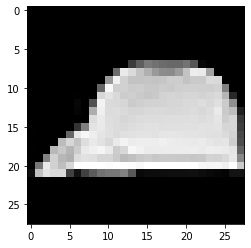

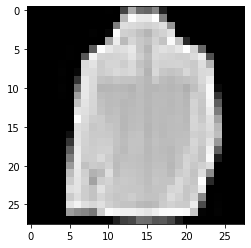

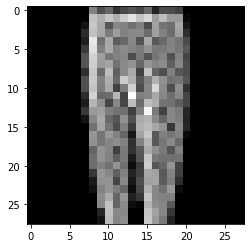

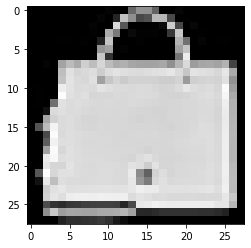

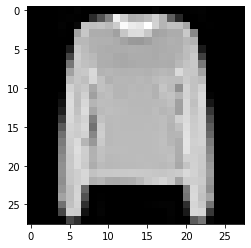

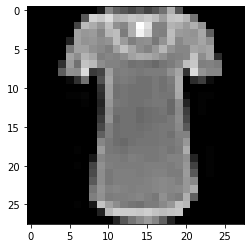

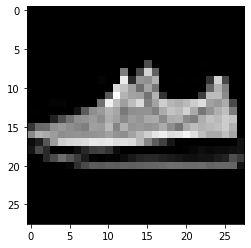

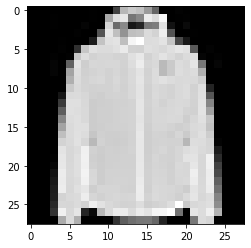

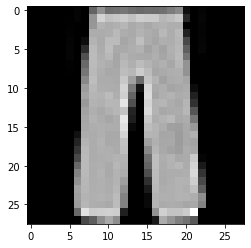

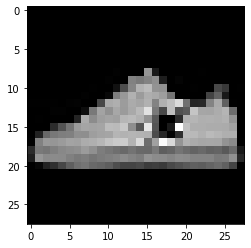

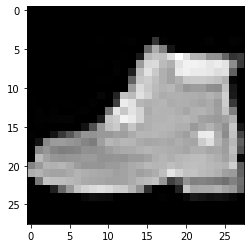

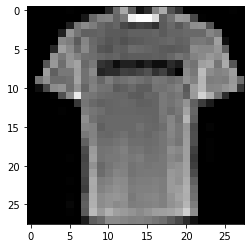

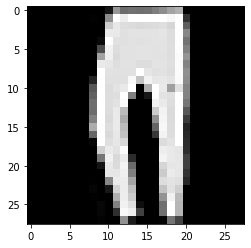

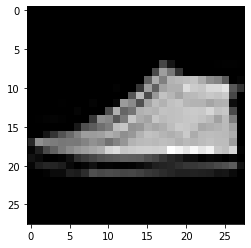

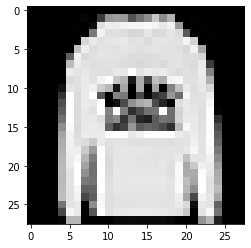

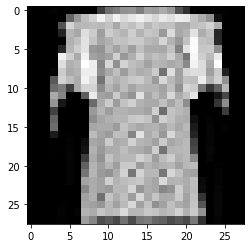

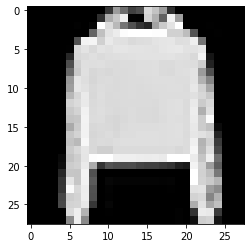

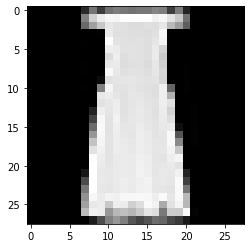

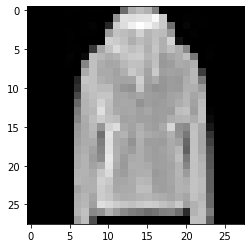

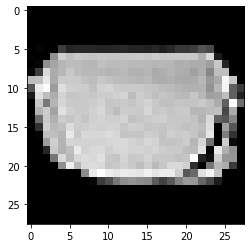

In [ ]:
for i in range(20):
   plt.imshow(X_train[i,:].reshape(28,28),cmap = 'gray')
   plt.show()

In [ ]:
J = []
iterations = []

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_test.csv" )
X_test = np.array(df1.iloc[0:10000,1:785])

NameError: ignored

In [ ]:
class NeuralNetwork:
  def __init__(self,layers):
    #layers contains number of neurons in every layer including input and output layer
    self.n = len(layers)
    self.layers = layers
    self.parameters = {}
    for i in range(1,self.n):
      self.parameters["W"+str(i)] = np.random.randn(layers[i],layers[i-1])*(np.sqrt(2/layers[i-1]))
      self.parameters["B"+str(i)] = np.random.randn(layers[i],1)
  def Normalization(self,X):
    self.mu = np.mean(X,axis = 0)
    self.sigma = np.std(X,axis = 0)
    return  (X-self.mu)/self.sigma
  def transform(self,Y):
    Y = Y.reshape(1,-1)
    Y_new = np.repeat(Y,10,axis = 0)
    A = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
    Y_new = np.where(Y==A,1,0)
    return Y_new
  def sigmoid(self,Z):
    return 1/(1+np.exp(-Z))
  def sigmoid_derivative(self,A):
    return A*(1-A)
  def relu(self,z):
    return np.maximum(0,z)
  def softmax(self,z):
    return (1/np.sum(np.exp(z),axis =0))*(np.exp(z))
  def relu_derivative(self,Z):
    return np.where(Z>0,1,0)
  def softmax_derivative(self,A,Y):
    dz = A - Y
    return dz
  def forward_pass(self,X,lamda):
    self.Z = []
    self.A = [X]
    self.dropout = [np.ones(X.shape)]
    for i in range(1,self.n-1):
        self.Z.append(np.dot(self.parameters["W"+str(i)],self.A[i-1])+self.parameters["B"+str(i)])
        a,b = self.relu(self.Z[i-1]).shape[0],self.relu(self.Z[i-1]).shape[1]
        self.dropout.append(np.random.randn(a,b)<lamda[i])
        self.A.append(self.relu(self.Z[i-1])*self.dropout[i]/lamda[i])
    self.Z.append(np.dot(self.parameters["W"+str(self.n-1)],self.A[self.n-2])+self.parameters["B"+str(self.n-1)])
    self.A.append(self.softmax(self.Z[self.n-2]))
  def backward_pass(self,Y,lamda):
    #Note this Y is assumed to be a transformed Y
    m = Y.shape[1]#number of training examples 
    self.gradients = {}
    self.gradients["dA"+str(self.n-1)] = -(Y)*(1/self.A[self.n-1])
    self.gradients["dZ"+str(self.n -1)] = (self.softmax_derivative(self.A[self.n-1],Y))
    i = self.n- 1
    while (i > 1):
      self.gradients["dW"+str(i)] = (np.dot(self.gradients["dZ"+str(i)],self.A[i-1].transpose()))/m
      self.gradients["db"+str(i)] = (np.sum(self.gradients["dZ"+str(i)],axis = 1,keepdims = True))/m
      self.gradients["dA"+str(i-1)] = np.dot(self.parameters["W"+str(i)].transpose(),self.gradients["dZ"+str(i)])*self.dropout[i-1]/lamda[i-1]
      self.gradients["dZ"+str(i-1)] = (self.relu_derivative(self.Z[i-2]))*(self.gradients["dA"+str(i-1)])
      i -= 1
    self.gradients["dW"+str(1)] = (np.dot(self.gradients["dZ"+str(1)],self.A[0].transpose()))/m 
    self.gradients["db"+str(1)] = (np.sum(self.gradients["dZ"+str(1)],axis = 1,keepdims = True))/m
  def fit(self,X,Y,learning_rate,epoches,lamda):
    #note lamda is the probability to keep any neurons in every layer 
    X = self.Normalization(X)
    X = X.transpose()
    Y = self.transform(Y)
    self.gradient_descent(X,Y,learning_rate,epoches,lamda)
  def gradient_descent(self,X,Y,learning_rate,epoches,lamda):
    for i in range(epoches):
      self.forward_pass(X,lamda)
      self.backward_pass(Y,lamda)
      C = []
      C.append(self.cost_function(Y))
      if i%50==0:
        print(f"Cost function at {i} th iteration is :-  {self.cost_function(Y)}")
        J.append(self.cost_function(Y))
        iterations.append(i)
      for j in range(1,self.n):
        self.parameters["W"+str(j)] -= (learning_rate)*(self.gradients["dW"+str(j)])
        self.parameters["B"+str(j)] -= (learning_rate)*(self.gradients["db"+str(j)])
      C_1 = self.cost_function(Y)
      if C_1>C[-1] and C_1>C[-2] and C_1>C[-3]:
        learning_rate *= 0.3
  def cost_function(self,Y):
    cost = 0
    cost = np.sum(np.sum((-1)*Y*np.log(self.A[self.n-1]),axis = 0,keepdims = True),axis = 1)
    cost /= Y.shape[1]
    return cost
  def evaluate(self,X_test):
    X_test= (X_test-self.mu)/self.sigma
    X_test = X_test.transpose()
    a = [1.0]
    for i in range (self.n):
      a.append(1.0)
    self.forward_pass(X_test,a)
    Y = np.argmax(self.A[self.n-1], axis=0,keepdims = True)
    return Y    
  def CVS(self,X_check,Y_check):
    Y_pred = self.evaluate(X_check) 
    return accuracy_score(Y_check.flatten(), Y_pred.flatten())

In [ ]:
model = NeuralNetwork([X_train.shape[1],100,10])
model.fit(X_train,Y_train,0.1,5000,[1,0.7,1])
print(model.CVS(X_train,Y_train.reshape(1,-1)))
print(model.CVS(X_CVS,Y_CVS.reshape(1,-1)))

Cost function at 0 th iteration is :-  [3.71676758]
Cost function at 50 th iteration is :-  [0.61506022]
Cost function at 100 th iteration is :-  [0.53172022]
Cost function at 150 th iteration is :-  [0.48758374]
Cost function at 200 th iteration is :-  [0.4573058]
Cost function at 250 th iteration is :-  [0.43759495]
Cost function at 300 th iteration is :-  [0.42428815]
Cost function at 350 th iteration is :-  [0.4088205]
Cost function at 400 th iteration is :-  [0.39674415]
Cost function at 450 th iteration is :-  [0.3848314]
Cost function at 500 th iteration is :-  [0.37978155]
Cost function at 550 th iteration is :-  [0.37137878]
Cost function at 600 th iteration is :-  [0.36214554]
Cost function at 650 th iteration is :-  [0.35650108]
Cost function at 700 th iteration is :-  [0.34659973]
Cost function at 750 th iteration is :-  [0.34512666]
Cost function at 800 th iteration is :-  [0.33845913]
Cost function at 850 th iteration is :-  [0.33245402]
Cost function at 900 th iteration 

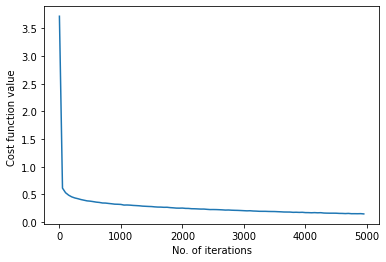

In [ ]:
plt.xlabel("No. of iterations")
plt.ylabel("Cost function value ")
plt.plot(iterations,J)
plt.show()

In [ ]:
print(model.CVS(X_train,Y_train.reshape(1,-1)))
print(model.CVS(X_CVS,Y_CVS.reshape(1,-1)))

0.95768
0.8736


In [ ]:
output = model.evaluate(X_test)
df1["output label"]=output.transpose()
a = np.array(df1.columns)
df2 = df1.drop(a[1:-1],axis = 1 )
df2
df2.to_csv('/content/drive/MyDrive/Project(WOC)/NeuralNetwork_output(2).csv')